<a href="https://colab.research.google.com/github/rishikaparashar/Customer-Churn-LR-Model/blob/master/CustomerChurnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


{'WA_Fn-UseC_-Telco-Customer-Churn.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.

In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [0]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [0]:
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [0]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


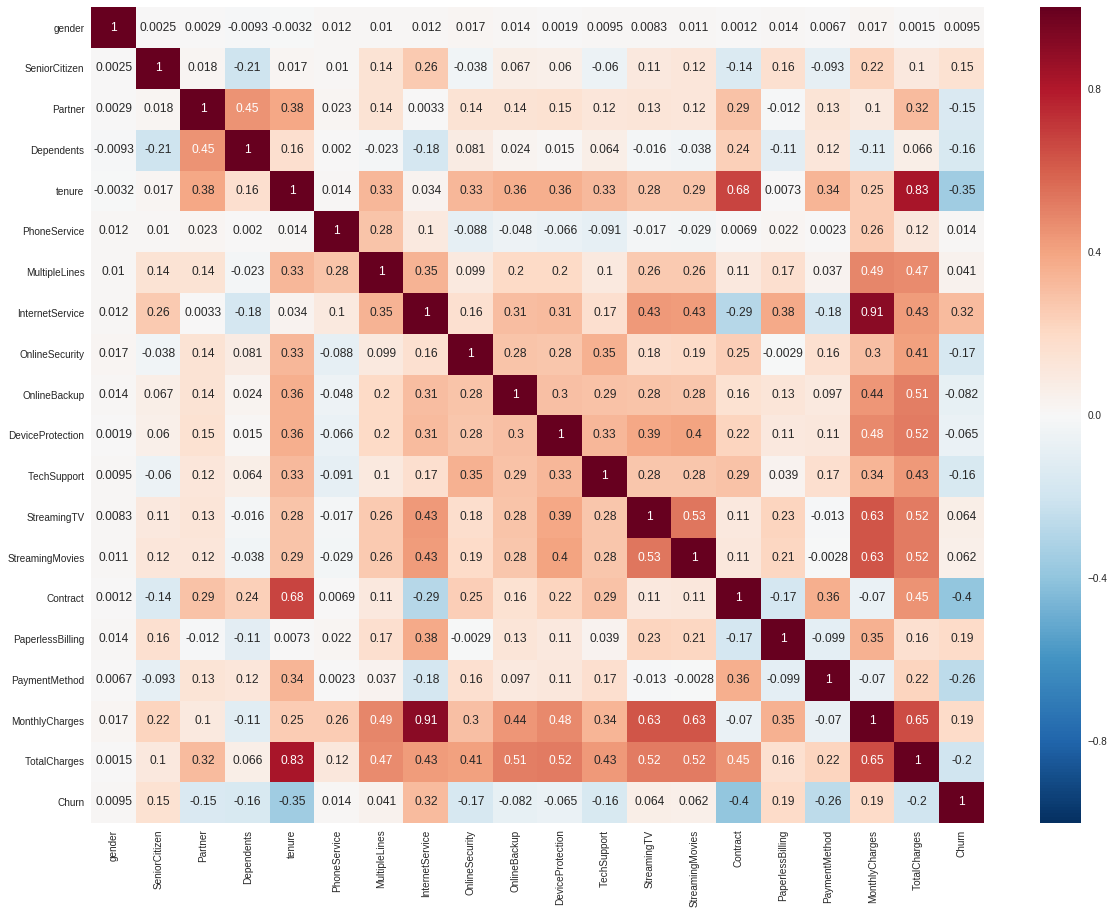

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [0]:
data.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [0]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(data, test_size = 0.30)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

5350    0
3987    1
5006    1
5772    0
1775    0
5170    0
4240    1
190     0
666     1
2462    0
2877    1
3936    0
5901    1
6351    1
6145    0
3762    0
1635    0
2220    0
1486    1
4212    1
1793    0
1669    0
648     1
1170    0
5759    1
6563    1
6099    0
1155    0
3858    0
4644    0
       ..
1424    0
3536    0
3230    0
290     1
191     1
2183    0
4165    0
3708    0
3763    1
1845    0
2406    1
321     0
5638    1
210     1
2307    0
852     0
3385    1
924     0
402     1
1870    0
6059    0
6793    0
6400    0
3381    0
349     0
5687    0
6328    0
6146    1
6165    0
2033    1
Name: Churn, Length: 2113, dtype: int64

In [65]:
	
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1580
           1       0.62      0.57      0.60       533

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.81      0.80      2113



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 28.5, 'Predicted label')

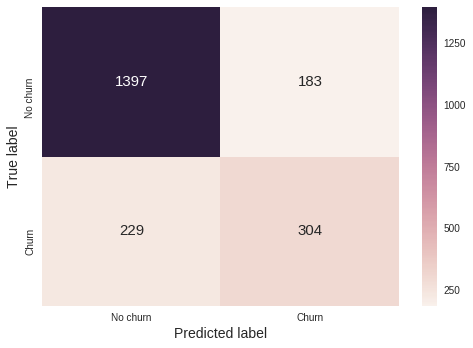

In [66]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 15}, fmt="d")
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)